<a href="https://colab.research.google.com/github/ykim879/machine.learning.soccer/blob/gh-pages/Copy_of_Soccer_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import numpy as np
from sklearn import linear_model
import pandas as pd

In [2]:
# extract data
dataset = pd.read_excel("linear_regression_data_(co2_EV_sales).xlsx")
dataset = dataset.iloc[:,1:]

co2emissions = np.asarray(dataset.iloc[1:,0].tolist())
evsales = np.asarray(dataset.iloc[1:,1].tolist())
totalcarsales = np.asarray(dataset.iloc[1:,2].tolist())
nonevsales = totalcarsales-evsales
n_total = len(co2emissions)
co2emissions, evsales, totalcarsales, nonevsales,n_total

(array([1813. , 1778.1, 1808.1, 1826.4, 1851.8, 1889.6, 1905.1, 1950. ]),
 array([  9178,  12820,  46832,  60363, 477674, 483753,  95610, 203625]),
 array([12695712, 15376264, 15490245, 16424017, 17404970, 17500719,
        17212565, 17323849]),
 array([12686534, 15363444, 15443413, 16363654, 16927296, 17016966,
        17116955, 17120224]),
 8)

In [3]:
#slope by scikit linear regression
reg = linear_model.LinearRegression(fit_intercept=True)
x1 = np.zeros((n_total, 2))
x1[:,0] = evsales
x1[:,1] = nonevsales
y1 = co2emissions.reshape(-1,1)
reg.fit(x1,y1)
pred = reg.predict(x1)
reg.set_params(normalize = True)
print('CO2 = ', reg.coef_[0,0], '(EV Sales) + ', reg.coef_[0,1], '(Non-EV Sales) + ', reg.intercept_[0])

CO2 =  3.868340736555007e-05 (EV Sales) +  2.1654615503991592e-05 (Non-EV Sales) +  1499.463936101593


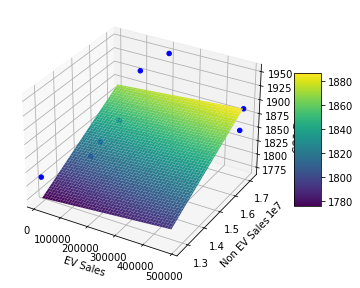

In [4]:
#generate prediction data for the plane
possible_ev = np.arange(np.amin(evsales),np.amax(evsales),(np.amax(evsales)-np.amin(evsales))/100)
possible_non = np.arange(np.amin(nonevsales),np.amax(nonevsales),(np.amax(nonevsales)-np.amin(nonevsales))/100)

possible_ev = possible_ev.reshape(1, possible_ev.shape[0])
possible_non = possible_non.reshape(possible_non.shape[0], 1)

possible_ev_mesh = np.repeat(possible_ev, possible_ev.shape[1], axis=0)
possible_non_mesh = np.repeat(possible_non, possible_non.shape[0], axis=1)
pred_co2 = reg.coef_[:,0]*possible_ev_mesh + reg.coef_[:,1]*possible_non_mesh + reg.intercept_

# #plotting linear regression
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(possible_ev_mesh, possible_non_mesh, pred_co2, cmap='viridis')
ax.scatter(evsales,nonevsales,co2emissions,c='blue',marker='o',alpha=1)

ax.set_xlabel('EV Sales')
ax.set_ylabel('Non EV Sales')
ax.set_zlabel('CO2 Emissions')

plt.tight_layout()
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
dataset.columns = dataset.iloc[0]
dataset.drop([0])

,CO2 emissions (million metric tons of carbon dioxide),EV sales (#of vehicles),Total car sales (# of vehicles)
1,1813,9178,12695712
2,1778.1,12820,15376264
3,1808.1,46832,15490245
4,1826.4,60363,16424017
5,1851.8,477674,17404970
6,1889.6,483753,17500719
7,1905.1,95610,17212565
8,1950,203625,17323849


## split_data
##### The method will split the data into train data and test data
**input:**
1. **df_x**: dataframe with x data
2. **df_y**: dataframe with y data

**output:**
x_train, x_test, y_train, y_test

In [12]:
from sklearn.model_selection import train_test_split
def split_data(df_x, df_y):
    return train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [35]:
#implementation
dataarr = dataset.to_numpy()
x = dataarr[1:, :2]
y = dataarr[1:, 2]
x_train, x_test, y_train, y_test = split_data(x,y)

In [39]:
#combine x_train and y_train
print(x_train.shape, y_train.shape, y_test.shape)
X = np.zeros((6,3))
X[:,:2] = x_train
X[:,2] = y_train
X

(6, 2) (6,) (2,)


array([[1.8264000e+03, 6.0363000e+04, 1.6424017e+07],
       [1.8130000e+03, 9.1780000e+03, 1.2695712e+07],
       [1.7781000e+03, 1.2820000e+04, 1.5376264e+07],
       [1.8896000e+03, 4.8375300e+05, 1.7500719e+07],
       [1.9051000e+03, 9.5610000e+04, 1.7212565e+07],
       [1.8081000e+03, 4.6832000e+04, 1.5490245e+07]])

In [72]:
from sklearn.preprocessing import PolynomialFeatures
def poly_with_degree(deg, x, y):
    poly_reg = PolynomialFeatures(degree = deg)
    X_poly = poly_reg.fit_transform(x)
    poly_reg.fit(X_poly, y)
    linear = linear_model.LinearRegression()
    linear.fit(X_poly,y)
    return poly_reg,linear

In [73]:
def predict(x_train,y_trian, x_test, deg):
    poly,linear = poly_with_degree(deg, x_train, y_train)
    return linear.predict(poly.fit_transform(x_test))

In [77]:
from sklearn.metrics import mean_squared_error
#implementation
def report_rmse(min_deg, max_deg):
    report = {}
    for d in range(min_deg,max_deg + 1):
        y_predict = predict(x_train,y_train,x_test,d)
        report[d] = mean_squared_error(y_test, y_predict)
    return report
poly_accuracy = report_rmse(1,7)
    

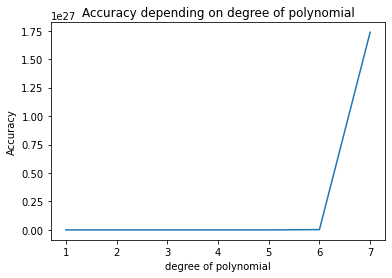

The bigger rmse is worse accuracy
smallest rmse is  209463328514.53656  with degree of  1


In [82]:
def report_accuracy(x,y, independent):
    plt.plot(x,y)
    plt.title("Accuracy depending on " + independent)
    plt.xlabel(independent)
    plt.ylabel("Accuracy")
    plt.show()
#report for dictionary
report_accuracy(poly_accuracy.keys(), poly_accuracy.values(), "degree of polynomial")
print("The bigger rmse is worse accuracy")
min_rmse = min(poly_accuracy, key= poly_accuracy.get)
print("smallest rmse is ", poly_accuracy[min_rmse], " with degree of ", min_rmse )